In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Get data from server
# rsync -a user@server:impacts_classifier/cv_2/ data/cv_results

In [3]:
# Collect inner cv results for the binary classifier
all_records = []
for rank_i in range(5):
    for rank_j in range(5):
        df = pd.read_csv(f'../data/cv_results/cv_results_{rank_i}_{rank_j}.csv')
        df['rank_i'] = rank_i
        df['rank_j'] = rank_j
        df = df.sort_values('F1',ascending=False).reset_index(drop=True)
        df['rank'] = df.index
        all_records += df.to_dict('records')

inner_df = pd.DataFrame.from_dict(all_records)
inner_df['classifier'] = "Inner relevance"
inner_df['model'] = "DistilBERT"
inner_df.head()

,ROC AUC,F1,precision,recall,accuracy,class_weight,batch_size,weight_decay,learning_rate,num_epochs,rank_i,rank_j,rank,classifier,model
0,0.908762,0.786885,0.705882,0.888889,0.880734,"{0: 1, 1: 4.228571428571429}",16,0.0,0.00001,4,0,0,0,Inner relevance,DistilBERT
1,0.835592,0.724138,0.677419,0.777778,0.853211,NaN,16,0.0,0.00005,4,0,0,1,Inner relevance,DistilBERT
2,0.915086,0.722222,0.577778,0.962963,0.816514,NaN,32,0.0,0.00001,4,0,0,2,Inner relevance,DistilBERT
3,0.908762,0.707692,0.605263,0.851852,0.825688,NaN,16,0.0,0.00001,2,0,0,3,Inner relevance,DistilBERT
4,0.907859,0.692308,0.720000,0.666667,0.853211,NaN,16,0.0,0.00001,3,0,0,4,Inner relevance,DistilBERT


In [4]:
# collect outer fold from binary classifier
results = []
for rank_i in range(5):
    results += pd.read_csv(f'../data/cv_results/outer_cv_results_{rank_i}.csv').to_dict('results')
df = pd.DataFrame.from_dict(results)
if "rank_k" not in df.columns:
    df['rank_k'] = df.index
df['model'] = "DistilBERT"

# outer fold for SVM results
results = []
for rank_i in range(5):
    results += pd.read_csv(f'../data/cv_results/svm_outer_{rank_i}.csv').to_dict('results')
svm_df = pd.DataFrame.from_dict(results)
svm_df['model'] = "SVM"

df = pd.concat([df,svm_df],sort=True)

df['classifier'] = "Outer relevance"

print(df.shape)

# Outer cv results for impacts

results = []
for rank_i in range(3):
    results += pd.read_csv(f'../data/cv_results/outer_cv_impacts_noround_{rank_i}.csv').to_dict('results')
outer_df = pd.DataFrame.from_dict(results)
if "rank_k" not in outer_df.columns:
    outer_df['rank_k'] = outer_df.index
outer_df['model'] = "DistilBERT"
outer_df['classifier'] = "Outer impacts"
df = pd.concat([df,outer_df],sort=True)

# outer fold for SVM results
results = []
for rank_i in range(3):
    results += pd.read_csv(f'../data/cv_results/svm_outer_impacts_noround_{rank_i}.csv').to_dict('results')
svm_df = pd.DataFrame.from_dict(results)
svm_df['model'] = "SVM"
svm_df['classifier'] = "Outer impacts"
df = pd.concat([df,svm_df],sort=True)

print(df.shape)


results = []
for rank_i in range(3):
    results += pd.read_csv(f'../data/cv_results/outer_cv_drivers_{rank_i}.csv').to_dict('results')
outer_df = pd.DataFrame.from_dict(results)
if "rank_k" not in outer_df.columns:
    outer_df['rank_k'] = outer_df.index
outer_df['model'] = "DistilBERT"
outer_df['classifier'] = "Outer drivers"

# outer fold for SVM results
results = []
for rank_i in range(3):
    results += pd.read_csv(f'../data/cv_results/svm_outer_drivers_{rank_i}.csv').to_dict('results')
svm_df = pd.DataFrame.from_dict(results)
svm_df['model'] = "SVM"
svm_df['classifier'] = "Outer drivers"
df = pd.concat([df,outer_df,svm_df],sort=True)
df['F1 - tp'] = df.loc[:,["F1 - 6 - Temperature","F1 - 6 - Precipitation"]].mean(axis=1)
df['ROC AUC - tp'] = df.loc[:,["ROC AUC - 6 - Temperature","ROC AUC - 6 - Precipitation"]].mean(axis=1)

print(df.shape)



df.head()

(10, 18)
(16, 68)
(22, 88)


/home/max/.local/lib/python3.6/site-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


,F1,F1 - 12 - Coastal and marine Ecosystems,F1 - 12 - Human and managed,"F1 - 12 - Mountains, snow and ice","F1 - 12 - Rivers, lakes, and soil moisture",F1 - 12 - Terrestrial ES,F1 - 6 - Other,F1 - 6 - Precipitation,F1 - 6 - Temperature,F1 macro,...,recall macro,recall micro,recall samples,recall weighted,vect__max_df,vect__min_df,vect__ngram_range,weight_decay,F1 - tp,ROC AUC - tp
0,0.727273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,0.686567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,0.629630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,0.741935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,0.760000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


DistilBERT
0.7090810009904859 0.6689683478817605 0.759346389854926 0.9174239546111869
SVM
0.6156213809609593 0.5996812831137773 0.6499252206741204 0.8606565001417442


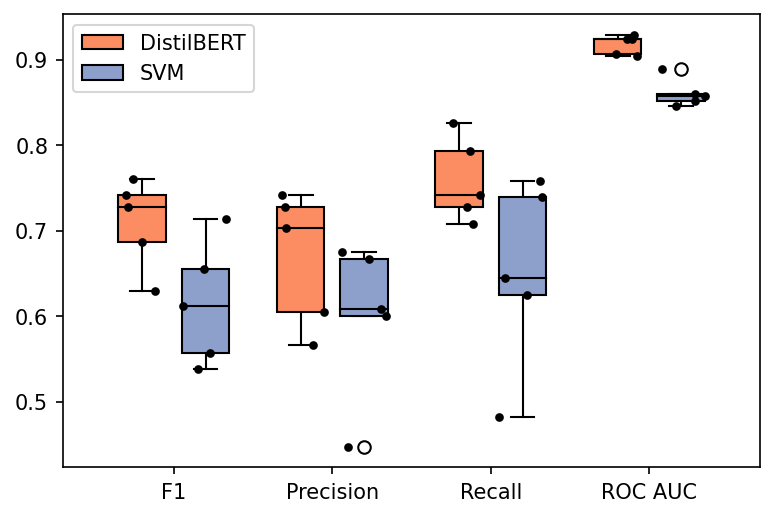

In [5]:
# compare svm with BERT
import random
fig, ax = plt.subplots(dpi=150)
offset = [-0.2,.2]
colors=['#fc8d62','#8da0cb']
boxes = []
labels = []
for i, (name, group) in enumerate(df[df['classifier']=="Outer relevance"].groupby('model')):
    print(name)
    print(np.mean(group['F1']),np.mean(group['precision']),np.mean(group['recall']), np.mean(group['ROC AUC']))
    bp = ax.boxplot(
        [group['F1'],group['precision'],group['recall'], group['ROC AUC']], positions=np.arange(4)+offset[i], widths=0.3,
        patch_artist=True,
        boxprops=dict(facecolor=colors[i]),
        medianprops=dict(color="black"),
    )
    x = []
    y = []
    for j, metric in enumerate(["F1","precision","recall","ROC AUC"]):
        x+=[j+offset[i]+random.randint(-15,15)*0.01 for k in range(group.shape[0])]
        y+=list(group[metric])
    boxes.append(bp)
    #ax.scatter(x, y, color=colors[i],edgecolor="black", zorder=5, s=10)
    ax.scatter(x, y, color="black",edgecolor="black", zorder=5, s=10)
    labels.append(name)
    
ax.set_xticks(range(4))
ax.set_xticklabels(["F1", "Precision", "Recall","ROC AUC"])
ax.legend([bp["boxes"][0] for bp in boxes], labels, loc='upper left')

plt.savefig('../figures/SI_figure_3.pdf')
plt.savefig('../figures/SI_figure_3.png', dpi=300)
plt.savefig('../figures/SI_figure_3.jpg', dpi=300)
plt.savefig('../figures/SI_figure_3.tiff', dpi=300)

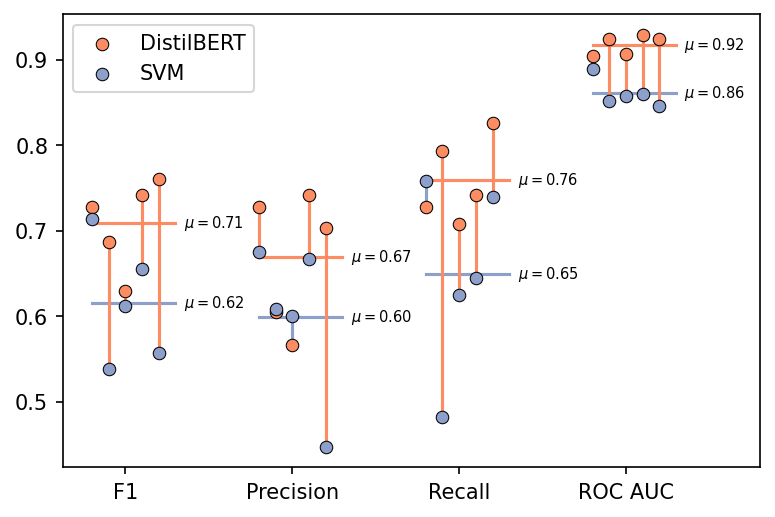

In [6]:
# compare svm with BERT
import random
fig, ax = plt.subplots(dpi=150)
offset = [-0.2,.2]
colors=['#fc8d62','#8da0cb']
boxes = []
labels = []

for j, metric in enumerate(["F1","precision","recall","ROC AUC"]):
    vals = []
    for i, (name, group) in enumerate(df[df['classifier']=="Outer relevance"].groupby('model')):
        vals.append(group[metric])
        if j ==0:
            label=name
        else:
            label=None
        s = ax.scatter(
            j-1/group.shape[0]+group['rank_k']*0.1,group[metric],
            color=colors[i],label=label,edgecolor="black",lw=0.5
        )
        
        ax.plot([j-1/group.shape[0],j-1/group.shape[0]+0.5],[group[metric].mean()]*2, color=colors[i],zorder=-5)
        ax.text(j-1/group.shape[0]+0.55,group[metric].mean(),f"$\mu={group[metric].mean():.2f}$",va="center",fontsize=7)
        
    for k, (val_1, val_2) in enumerate(zip(*vals)):
        if val_1>val_2:
            c=colors[0]
        else:
            c=colors[1]
        ax.plot([j-1/group.shape[0]+k*0.1]*2,[val_1,val_2],color=c, zorder=-1)
        
ax.set_xlim(xmax=ax.get_xlim()[1]+0.33)
ax.legend(loc='upper left')
        
ax.set_xticks(range(4))
ax.set_xticklabels(["F1", "Precision", "Recall","ROC AUC"])

plt.savefig('../figures/SI_figure_3.pdf')
plt.savefig('../figures/SI_figure_3.png', dpi=300)
plt.savefig('../figures/SI_figure_3.jpg', dpi=300)
plt.savefig('../figures/SI_figure_3.tiff', dpi=300)

0
1


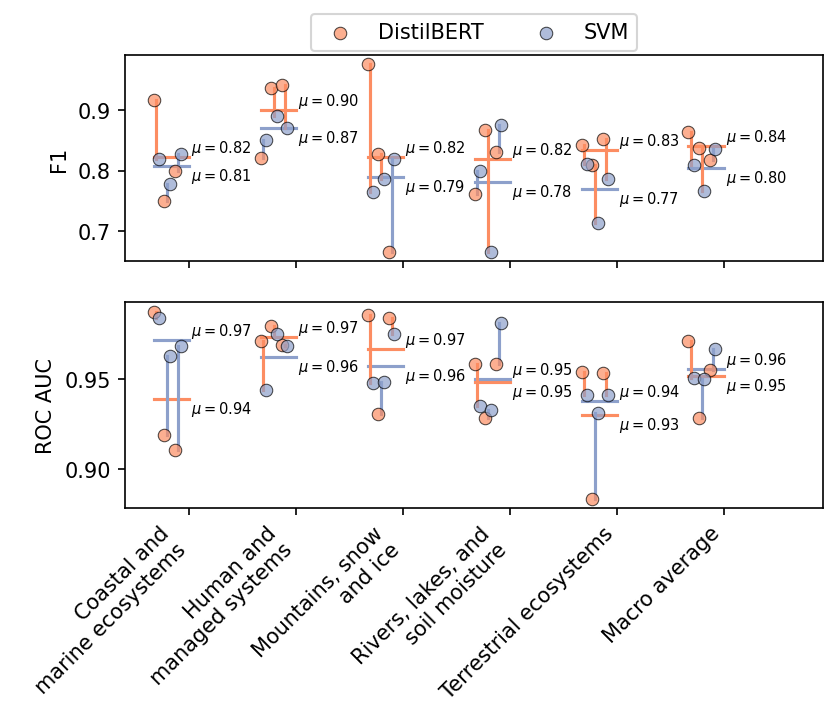

In [7]:
from adjustText import adjust_text

# compare svm with BERT
import random
fig, axs = plt.subplots(2,dpi=150, sharex=True)

offset = [-0.2,.2]
colors=['#fc8d62','#8da0cb']
boxes = []
labels = []
metrics = ['F1 macro', 'precision macro', 'recall macro', 'ROC AUC macro']
xticklabels = [
    "Coastal and\nmarine ecosystems",
    "Human and\nmanaged systems",
    "Mountains, snow\nand ice",
    #"Climate variables",
    "Rivers, lakes, and\nsoil moisture",
    "Terrestrial ecosystems",
    "Macro average"
]
for h,scoretype in enumerate(["F1 - 12","ROC AUC - 12"]):
    texts = []
    print(h)
    ax = axs[h]
    ax.set_ylabel(scoretype.split(' -')[0])
    scores = {x:group[x] for x in df.columns if scoretype in x or f"{scoretype.split()[0]}" in x and "macro" in x}
    for j, metric in enumerate(scores):
        vals = []
        means = []
        for i, (name, group) in enumerate(df[df['classifier']=="Outer impacts"].groupby('model')):
            vals.append(group[metric])
            if j ==0:
                label=name
            else:
                label=None
            s = ax.scatter(
                j-1/group.shape[0]+group['rank_k']*0.1+i*0.05,group[metric],
                color=colors[i],label=label,edgecolor="black",lw=0.5,alpha=0.7
            )
            ax.plot([j-1/group.shape[0],j-1/group.shape[0]+0.33],[group[metric].mean()]*2, color=colors[i],zorder=-5)
            means.append(group[metric].mean())
            
        means.sort()    
        align = ["top","bottom"]
        for i, m in enumerate(means):    
            ax.text(j-1/group.shape[0]+0.35,m,f"$\mu={m:.2f}$",va=align[i],fontsize=7)

        for k, (val_1, val_2) in enumerate(zip(*vals)):
            if val_1>val_2:
                c=colors[0]
            else:
                c=colors[1]
            ax.plot([j-1/group.shape[0]+k*0.1+0.025]*2,[val_1,val_2],color=c, zorder=-1)
            

            
    ax.set_xlim(xmax=ax.get_xlim()[1]+0.33)
        
ax = axs[1]
ax.set_xticks(np.arange(len(scores.keys())))
ax.set_xticklabels(xticklabels, rotation=45, ha="right")
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5,1.25), ncol=3)
plt.savefig('../figures/SI_figure_4.pdf', bbox_inches="tight")
plt.savefig('../figures/SI_figure_4.png', dpi=300, bbox_inches="tight")
plt.savefig('../figures/SI_figure_4.jpg', dpi=300, bbox_inches="tight")
plt.savefig('../figures/SI_figure_4.tiff', dpi=300, bbox_inches="tight")

DistilBERT
F1 - tp 0.791778862922916
ROC AUC macro 0.8366725585772201
SVM
F1 - tp 0.696050747125963
ROC AUC macro 0.777962189800986


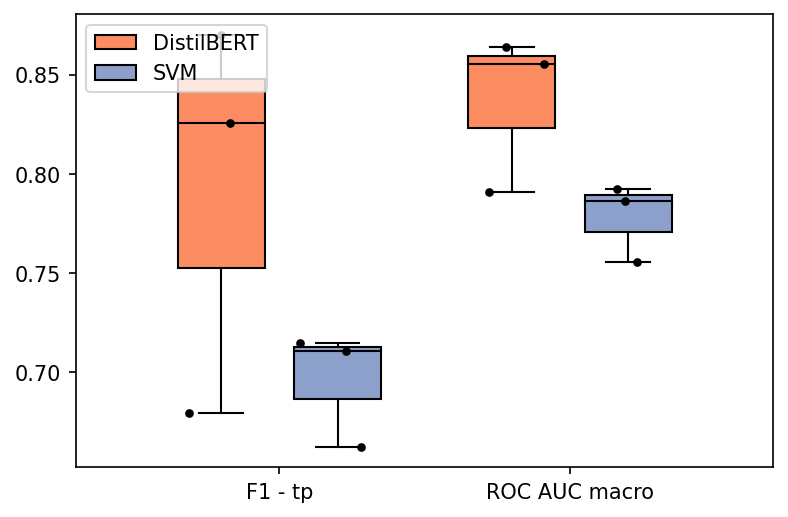

In [8]:
# compare svm with BERT
import random
fig, ax = plt.subplots(dpi=150)
offset = [-0.2,.2]
colors=['#fc8d62','#8da0cb']
boxes = []
labels = []
metrics = ['F1 - tp', 'ROC AUC macro']
for i, (name, group) in enumerate(df[df['classifier']=="Outer drivers"].groupby('model')):
    print(name)
    for m in metrics:
        print(m, np.mean(group[m]))
    bp = ax.boxplot(
        [group[x] for x in metrics], positions=np.arange(len(metrics))+offset[i], widths=0.3,
        patch_artist=True,
        boxprops=dict(facecolor=colors[i]),
        medianprops=dict(color="black"),
    )
    x = []
    y = []
    for j, metric in enumerate(metrics):
        x+=[j+offset[i]+random.randint(-15,15)*0.01 for k in range(group.shape[0])]
        y+=list(group[metric])
    boxes.append(bp)
    #ax.scatter(x, y, color=colors[i],edgecolor="black", zorder=5, s=10)
    ax.scatter(x, y, color="black",edgecolor="black", zorder=5, s=10)
    labels.append(name)
    
ax.set_xticks(range(len(metrics)))
ax.set_xticklabels(metrics)
ax.legend([bp["boxes"][0] for bp in boxes], labels, loc='upper left')

DistilBERT
F1 - tp 0.791778862922916
ROC AUC macro 0.8366725585772201
SVM
F1 - tp 0.696050747125963
ROC AUC macro 0.777962189800986


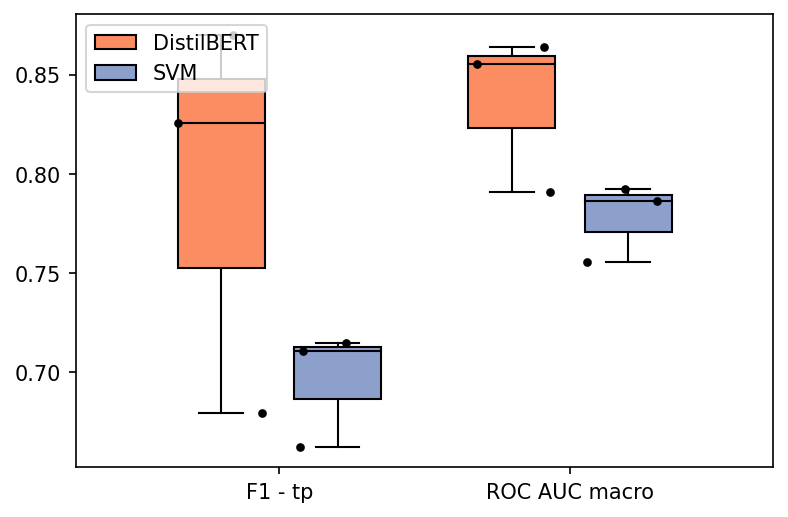

In [9]:
# compare svm with BERT
import random
fig, ax = plt.subplots(dpi=150)
offset = [-0.2,.2]
colors=['#fc8d62','#8da0cb']
boxes = []
labels = []
metrics = ['F1 - tp', 'ROC AUC macro']
for i, (name, group) in enumerate(df[df['classifier']=="Outer drivers"].groupby('model')):
    print(name)
    for m in metrics:
        print(m, np.mean(group[m]))
    bp = ax.boxplot(
        [group[x] for x in metrics], positions=np.arange(len(metrics))+offset[i], widths=0.3,
        patch_artist=True,
        boxprops=dict(facecolor=colors[i]),
        medianprops=dict(color="black"),
    )
    x = []
    y = []
    for j, metric in enumerate(metrics):
        x+=[j+offset[i]+random.randint(-15,15)*0.01 for k in range(group.shape[0])]
        y+=list(group[metric])
    boxes.append(bp)
    #ax.scatter(x, y, color=colors[i],edgecolor="black", zorder=5, s=10)
    ax.scatter(x, y, color="black",edgecolor="black", zorder=5, s=10)
    labels.append(name)
    
ax.set_xticks(range(len(metrics)))
ax.set_xticklabels(metrics)
ax.legend([bp["boxes"][0] for bp in boxes], labels, loc='upper left')

0
F1 - 6 - Precipitation
F1 - 6 - Temperature
F1 - tp
1
ROC AUC - 6 - Precipitation
ROC AUC - 6 - Temperature
ROC AUC - tp


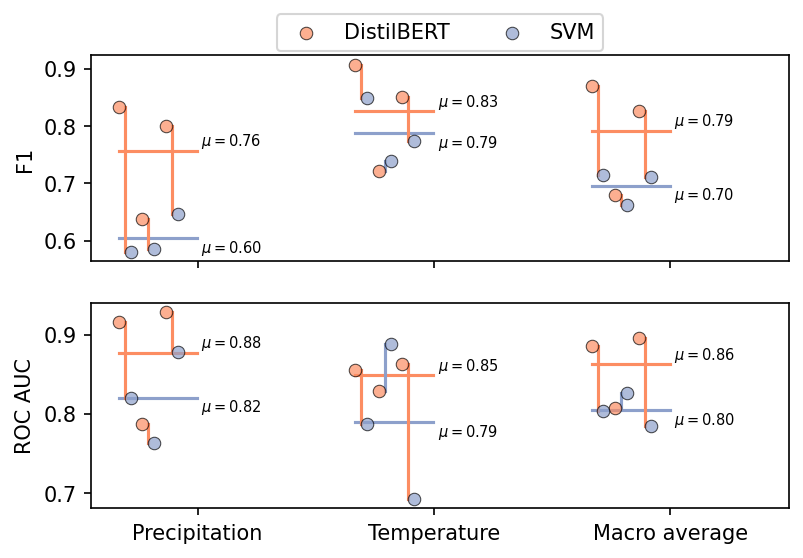

In [8]:
# compare svm with BERT
import random
fig, axs = plt.subplots(2,dpi=150, sharex=True)

offset = [-0.2,.2]
colors=['#fc8d62','#8da0cb']
boxes = []
labels = []
metrics = ['F1 macro', 'precision macro', 'recall macro', 'ROC AUC macro']

xticklabels = [
    "Precipitation",
    "Temperature",
    "Macro average"
]
for h,scoretype in enumerate(["F1 - 6","ROC AUC - 6"]):
    print(h)
    ax = axs[h]
    ax.set_ylabel(scoretype.split(' -')[0])
    scores = {x:group[x] for x in df.columns if scoretype in x and "Other" not in x or scoretype.split()[0] in x and "tp" in x}
    for j, metric in enumerate(scores):
        print(metric)
        vals = []
        means = []
        for i, (name, group) in enumerate(df[df['classifier']=="Outer drivers"].groupby('model')):
            vals.append(group[metric])
            if j ==0:
                label=name
            else:
                label=None
            s = ax.scatter(
                j-1/group.shape[0]+group['rank_k']*0.1+i*0.05,group[metric],
                color=colors[i],label=label,edgecolor="black",lw=0.5,alpha=0.7
            )
            
            ax.plot([j-1/group.shape[0],j-1/group.shape[0]+0.33],[group[metric].mean()]*2, color=colors[i],zorder=-5)
            means.append(group[metric].mean())
            
        means.sort()
        for i, m in enumerate(means):
            ax.text(j-1/group.shape[0]+0.35,m,f"$\mu={m:.2f}$",va=align[i],fontsize=7)

        for k, (val_1, val_2) in enumerate(zip(*vals)):
            if val_1>val_2:
                c=colors[0]
            else:
                c=colors[1]
            ax.plot([j-1/group.shape[0]+k*0.1+0.025]*2,[val_1,val_2],color=c, zorder=-1)
        
ax = axs[1]
ax.set_xticks(np.arange(len(scores.keys())))

ax.set_xticklabels(xticklabels)
ax.set_xlim(xmax=2.5)
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5,1.25), ncol=3)

plt.savefig('../figures/SI_figure_5.pdf', bbox_inches="tight")
plt.savefig('../figures/SI_figure_5.png', dpi=300, bbox_inches="tight")

plt.savefig('../figures/SI_figure_5.jpg', dpi=300, bbox_inches="tight")
plt.savefig('../figures/SI_figure_5.tiff', dpi=300, bbox_inches="tight")

In [15]:
scores.keys()

dict_keys(['ROC AUC - 6 - Precipitation', 'ROC AUC - 6 - Temperature', 'ROC AUC - tp'])

0
F1 - 6 - Precipitation
F1 - 6 - Temperature
F1 - tp
1
ROC AUC - 6 - Precipitation
ROC AUC - 6 - Temperature
ROC AUC - tp


NameError: name 'f1_scores' is not defined

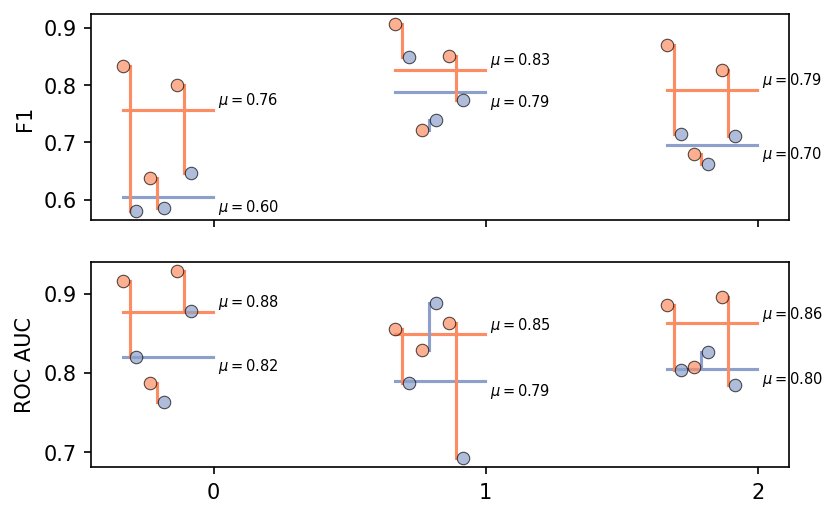

In [9]:
# compare svm with BERT
import random
fig, axs = plt.subplots(2,dpi=150, sharex=True)

offset = [-0.2,.2]
colors=['#fc8d62','#8da0cb']
boxes = []
labels = []
metrics = ['F1 macro', 'precision macro', 'recall macro', 'ROC AUC macro']

xticklabels = [
    "Precipitation",
    "Temperature",
    "Macro average"
]
for h,scoretype in enumerate(["F1 - 6","ROC AUC - 6"]):
    print(h)
    ax = axs[h]
    ax.set_ylabel(scoretype.split(' -')[0])
    scores = {x:group[x] for x in df.columns if scoretype in x and "Other" not in x or scoretype.split()[0] in x and "tp" in x}
    for j, metric in enumerate(scores):
        print(metric)
        vals = []
        means = []
        for i, (name, group) in enumerate(df[df['classifier']=="Outer drivers"].groupby('model')):
            vals.append(group[metric])
            if j ==0:
                label=name
            else:
                label=None
            s = ax.scatter(
                j-1/group.shape[0]+group['rank_k']*0.1+i*0.05,group[metric],
                color=colors[i],label=label,edgecolor="black",lw=0.5,alpha=0.7
            )
            
            ax.plot([j-1/group.shape[0],j-1/group.shape[0]+0.33],[group[metric].mean()]*2, color=colors[i],zorder=-5)
            means.append(group[metric].mean())
            
        means.sort()
        for i, m in enumerate(means):
            ax.text(j-1/group.shape[0]+0.35,m,f"$\mu={m:.2f}$",va=align[i],fontsize=7)

        for k, (val_1, val_2) in enumerate(zip(*vals)):
            if val_1>val_2:
                c=colors[0]
            else:
                c=colors[1]
            ax.plot([j-1/group.shape[0]+k*0.1+0.025]*2,[val_1,val_2],color=c, zorder=-1)
        
ax = axs[1]
ax.set_xticks(np.arange(len(scores.keys())))
ax.set_xticklabels([x.split('12 - ')[-1].replace('and','\nand\n') for x in f1_scores.keys()], rotation=45, ha="right")
ax.set_xticklabels(xticklabels, rotation=45, ha="right")
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5,1.25), ncol=3)

plt.savefig('../figures/SI_figure_5.pdf', bbox_inches="tight")
plt.savefig('../figures/SI_figure_5.png', dpi=300, bbox_inches="tight")

plt.savefig('../figures/SI_figure_5.jpg', dpi=300, bbox_inches="tight")
plt.savefig('../figures/SI_figure_5.tiff', dpi=300, bbox_inches="tight")

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, KFold
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pickle

df = pd.read_csv('../data/0_labelled_documents.csv')

# df = (df
#       .sort_values('id')
#       .sample(frac=1, random_state=1)
#       .reset_index(drop=True)
# )

df = (df
      .query('unlabelled==0')
      .query('relevant==1')
      .sort_values('id')
      .sample(frac=1, random_state=2)
      .reset_index(drop=True)
)


targets = [x for x in df.columns if "12 - " in x and "Physical systems" not in x]

y = df[targets]

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)

print(targets)

print(df.shape)
                                                                                
seen_index = df[df['seen']==1].index                                            
unseen_index = df[df['seen']==0].index                                          
new_index = df[(df['seen']==1) & (df['ar5']==0)].index                          
rel_index = df[df['relevant']==1].index                                         
r_index = df[(df["random_sample"]==1) | (df["representative_relevant_sample"]==1)].index  
rep_index = df[df["representative_relevant_sample"]==1].index  
physical_index = df[df['physical_tags']==1].index    

df.loc[df['representative_relevant_sample']==1,'random_sample'] = 1                                                                                                                                          


revectorize = True

X_exists = os.path.isfile(f'../data/X_{df.shape[0]}.npz')

vec = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=10, max_df=0.8, strip_accents='unicode', 
    max_features=20000,
    #tokenizer=snowball_stemmer()
)

X = vec.fit_transform(df['title'].astype("str") + " " + df['content'].astype("str"))   
       
X.shape
    
def KFoldRandom(n_splits, X, no_test, shuffle=False, discard=True):
    kf = KFold(n_splits=n_splits, shuffle=shuffle)
    for train, test in kf.split(X):
        if not discard:
            train = list(train) +  [x for x in test if x in no_test]
        test = [x for x in test if x not in no_test]
        yield (train, test)

def KFoldRandom(n_splits, X, no_test, shuffle=False, discard=True):
    kf = KFold(n_splits=n_splits, shuffle=shuffle)
    for train, test in kf.split(X):
        if not discard:
            train = list(train) +  [x for x in test if x in no_test]
        test = [x for x in test if x not in no_test]
        yield (train, test)

outer_cv = KFoldRandom(3, df.index, df[(df["random_sample"]==0) & (df["representative_relevant_sample"]==0)].index, discard=False)

df['prediction'] = np.NaN

for k, (train, test) in enumerate(outer_cv):   
    print(df[(df['12 - Mountains, snow and ice']==1) & (df.index.isin(train))].shape, len(train))
    print(df[(df['12 - Mountains, snow and ice']==1) & (df.index.isin(test))].shape, len(test))
    yp = np.load(f'../data/cv_results/y_preds_impacts_{k}.npz.npy')
    #print(yp.shape)
    #print(len(test))
    #df.loc[test,'prediction'] = yp[:,1]
    


In [ ]:
from sklearn.model_selection import StratifiedKFold
kf = KFold(n_splits=3)
for train, test in kf.split(X[np.array(r_index)]):
    test = r_index[test]
    print(df[(df['12 - Mountains, snow and ice']==1) & (df.index.isin(test))].shape, len(test))

In [ ]:
for i, row in df[df['12 - Mountains, snow and ice']==1].head().iterrows():
    print()
    print(row['content'])

In [ ]:
df.columns

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, KFold
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pickle

df = pd.read_csv('../data/0_labelled_documents.csv')

# df = (df
#       .sort_values('id')
#       .sample(frac=1, random_state=1)
#       .reset_index(drop=True)
# )

df = (df
      .query('unlabelled==0')
      .query('relevant==1')
      .sort_values('id')
      .sample(frac=1, random_state=1)
      .reset_index(drop=True)
)

df = (df
      .query('driver_coded==1')
      .query('relevant==1')
      .sort_values('id')
      .sample(frac=1, random_state=1)
      .reset_index(drop=True)
)

df.loc[df['representative_relevant_sample']==1,'random_sample']=1

targets = [x for x in df.columns if "12 - " in x and "Physical systems" not in x]

targets = ['6 - Temperature','6 - Precipitation','6 - Other']

print(targets)

print(df.shape)
                                                                                
seen_index = df[df['seen']==1].index                                            
unseen_index = df[df['seen']==0].index                                          
new_index = df[(df['seen']==1) & (df['ar5']==0)].index                          
rel_index = df[df['relevant']==1].index                                         
r_index = df[df["random_sample"]==1].index                                      
physical_index = df[df['physical_tags']==1].index    

revectorize = True

X_exists = os.path.isfile(f'../data/X_{df.shape[0]}.npz')

vec = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=10, max_df=0.8, strip_accents='unicode', 
    max_features=20000,
    #tokenizer=snowball_stemmer()
)

X = vec.fit_transform(df['title'].astype("str") + " " + df['content'].astype("str"))   
       
X.shape
    
def KFoldRandom(n_splits, X, no_test, shuffle=False, discard=True):
    kf = KFold(n_splits=n_splits, shuffle=shuffle)
    for train, test in kf.split(X):
        if not discard:
            train = list(train) +  [x for x in test if x in no_test]
        test = [x for x in test if x not in no_test]
        yield (train, test)

def KFoldRandom(n_splits, X, no_test, shuffle=False, discard=True):
    kf = KFold(n_splits=n_splits, shuffle=shuffle)
    for train, test in kf.split(X):
        if not discard:
            train = list(train) +  [x for x in test if x in no_test]
        test = [x for x in test if x not in no_test]
        yield (train, test)

outer_cv = KFoldRandom(3, df.index, df[df['random_sample']!=1].index, discard=False)

df['prediction'] = np.NaN

for k, (train, test) in enumerate(outer_cv):                                    
    yp = np.load(f'../data/cv_results/y_preds_drivers_{k}.npz.npy')
    print(yp.shape)
    print(len(test))
    df.loc[test,'prediction'] = yp[:,1]
    


In [ ]:
df.loc[539,'title']

In [ ]:
import scipy
ary = scipy.spatial.distance.cdist(X[649].todense(), X.todense(), metric='euclidean')

for i in range(1,15):
    r = df.iloc[ary.argsort()[0][i]]
    print(r.content)
    print(r.relevant)
    print(r.id)
    print()

In [ ]:
[x for x in df.columns if "Humidity" in x]

In [ ]:
fps = df[(df['6 - Precipitation']==0) & (df['prediction']>0.5) & (pd.notna(df['prediction']))]

for i, row in fps.sort_values('prediction',ascending=False).iterrows():
    print(row['id'], " - ", i,  " - ", row['title'])
    print(row['content'])
    print(row['prediction'])
    print()

In [ ]:
import scipy
ary = scipy.spatial.distance.cdist(X[2318].todense(), X.todense(), metric='euclidean')

for i in range(1,5):
    r = df.iloc[ary.argsort()[0][i]]
    print(r.content)
    print(r.relevant)
    print(r.id)
    print()

In [ ]:
fns = df[(df['6 - Precipitation']==1) & (df['prediction']<0.5) & (pd.notna(df['prediction']))]

for i, row in fns.sort_values('prediction').iterrows():
    print(row['id'], " - ", i,  " - ", row['title'])
    print(row['content'])
    print(row['prediction'])